In [76]:
from nepc import nepc
from nepc.util import config
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [67]:
NEPC_HOME = config.nepc_home()

In [68]:
pd.set_option('max_colwidth', 120)

In [69]:
cnx, cursor = nepc.connect(local=True)

In [70]:
type(cnx)

mysql.connector.connection.MySQLConnection

In [71]:
type(cursor)

mysql.connector.cursor.MySQLCursor

In [72]:
n_ionization_partial = nepc.cs_subset(cursor, specie="N", process="ionization_partial")

In [92]:
n_ionization_partial[0]['e']

[14.54,
 17.5,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0]

In [73]:
n_ionization_total = sp.genfromtxt(NEPC_HOME + "/examples/n_ionization_total_brook.dat", 
                                   delimiter="\t",
                                  skip_header=1,
                                  usecols=(1,2,3))

In [74]:
n_ionization_total_dict = {"e": list(n_ionization_total[...,0]),
                           "sigma": list(n_ionization_total[...,1]),
                           "sigma_error": list(n_ionization_total[...,2])}

Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


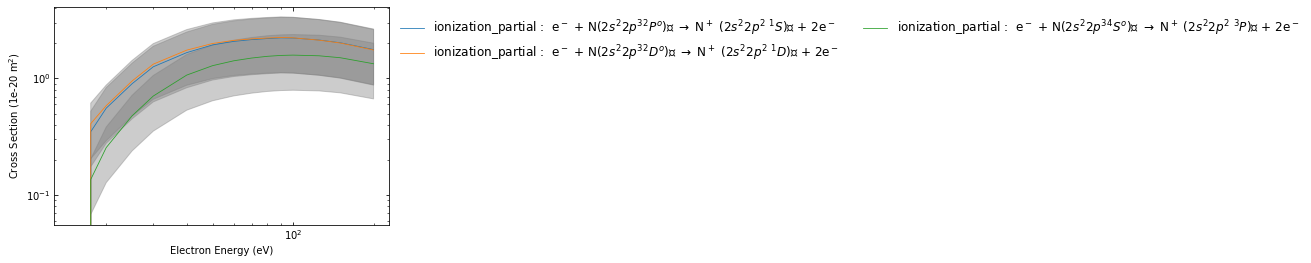

In [75]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, n_ionization_partial, 1E-20,
                        'ionization_partial',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True, max_plots=4, width=8, height=4) 

In [93]:
np.array(n_ionization_partial[0]['e'])

array([ 14.54,  17.5 ,  20.  ,  25.  ,  30.  ,  40.  ,  50.  ,  60.  ,
        70.  ,  80.  ,  90.  , 100.  , 125.  , 150.  , 200.  ])

In [99]:
n_ionization_partial[0]

{'cs_id': 178,
 'specie': 'N',
 'process': 'ionization_partial',
 'units_e': 1.0,
 'units_sigma': 1e-20,
 'ref': 'wang2014',
 'lhsA': 'N_2s22p3_2Po',
 'lhsB': None,
 'rhsA': 'N+_2s12p3_1S',
 'rhsB': None,
 'wavelength': None,
 'lhs_v': None,
 'rhs_v': None,
 'lhs_j': None,
 'rhs_j': None,
 'background': 'From BSR calculations. Raw data provided by Zatsarinny.  Used predominate electronic state for N+ on RHS (ground state); however, there is significant 2s-ionization above 20 eV with ~15% contribution at 100 eV.',
 'lpu': None,
 'upu': None,
 'e': [14.54,
  17.5,
  20.0,
  25.0,
  30.0,
  40.0,
  50.0,
  60.0,
  70.0,
  80.0,
  90.0,
  100.0,
  125.0,
  150.0,
  200.0],
 'sigma': [0.0,
  0.3494,
  0.5563,
  0.9019,
  1.2591,
  1.6641,
  1.9392,
  2.078,
  2.1529,
  2.197,
  2.2297,
  2.2205,
  2.1347,
  2.0232,
  1.7667],
 'lhsA_long': 'N($2s^22p^3 {}^2P^o$)\r',
 'lhsB_long': None,
 'rhsA_long': 'N${}^+$ ($2s^22p^2$ ${}^1S$)\r',
 'rhsB_long': None,
 'e_on_lhs': 1,
 'e_on_rhs': 2,
 'hv_o

Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


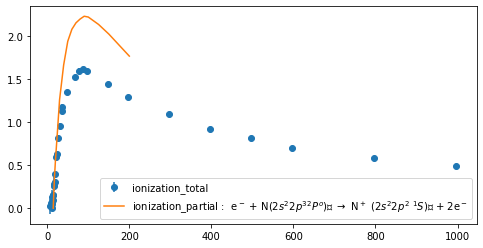

In [101]:
fig = plt.figure()
x = n_ionization_total[...,0]
y = n_ionization_total[...,1]
yerr = n_ionization_total[...,2]

plt.errorbar(x, y, yerr=yerr, fmt='o', label='ionization_total')

x = np.array(n_ionization_partial[0]['e'])
y = np.array(n_ionization_partial[0]['sigma'])

reaction = nepc.reaction_latex(n_ionization_partial[0])
label_items = [n_ionization_partial[0]['process'], ": ", reaction]
label_text = " ".join(item for item in label_items if item)

plt.errorbar(x, y, label='{}'.format(label_text))

plt.legend(loc='lower right')

In [32]:
cnx.close()